In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import truncnorm
from scipy.optimize import curve_fit

In [10]:
# data = np.load("/home/bapi_cms/Desktop/ML4HEP/Workshop/rechit_energy_ratios.npz")

In [11]:
# data_raw = pd.read_csv('rechits_50000_events.csv')

In [12]:
# data_raw

In [13]:
# train_dataset = h5py.File("/home/bapi_cms/Downloads/hgcal_electron_data_0001.h5", "r")

In [14]:
# nhits = np.array(train_dataset['nhits'])[0:50000]
# target_energy = np.array(train_dataset['target'])[0:50000]

In [15]:
# nhits.shape

In [16]:
# nhits

In [17]:
# data

In [18]:
# data.files

In [19]:
# data['z_energy_sum'].shape

In [20]:
# data['e1_over_e7'].shape

In [21]:
# data['e7_over_e19'].shape

In [22]:
# for i in range(29):
#     z_E_sum_layer_i = data['z_energy_sum'][i]

In [23]:
# for i in range(28):
    # globals()[f'z_E_sum_layer_{i}'] = data['z_energy_sum'][i]

In [24]:
# z_E_sum_layer_1.shape

In [25]:
# # Create a dictionary to hold each column
# column_dict = {}

# # Loop over the 28 vectors
# for i in range(28):
#     column_name = f'z_E_sum_layer_{i}'
#     column_dict[column_name] = data['z_energy_sum'][i]

# for i in range(28):
#     column_name = f'e1_by_e7_{i}'
#     column_dict[column_name] = data['e1_over_e7'][i]

# for i in range(28):
#     column_name = f'e7_over_e19_{i}'
#     column_dict[column_name] = data['e7_over_e19'][i]

# column_name = f'nhits'
# column_dict[column_name] = nhits


# column_name = f'target_energy'
# column_dict[column_name] = target_energy

# # Convert to a DataFrame (each key becomes a column)
# df = pd.DataFrame(column_dict)

# # Save to a single CSV file
# df.to_csv('Feature_vector_full.csv', index=False)

In [26]:
df = pd.read_csv('Feature_vector_full.csv')

In [27]:
df.head()

,z_E_sum_layer_0,z_E_sum_layer_1,z_E_sum_layer_2,z_E_sum_layer_3,z_E_sum_layer_4,z_E_sum_layer_5,z_E_sum_layer_6,z_E_sum_layer_7,z_E_sum_layer_8,z_E_sum_layer_9,...,e7_over_e19_20,e7_over_e19_21,e7_over_e19_22,e7_over_e19_23,e7_over_e19_24,e7_over_e19_25,e7_over_e19_26,e7_over_e19_27,nhits,target_energy
0,29.806881,116.785048,551.959116,867.931910,1394.833763,1434.385677,1998.590474,2083.453882,2828.288451,2199.648372,...,0.682573,0.760595,0.392955,0.459872,0.858418,0.742760,0.854952,0.688523,1115.0,286.606530
1,60.289388,154.114308,418.088728,486.282714,946.419755,1352.768847,1961.278227,2068.751030,2432.984322,2092.910957,...,0.688918,0.759534,0.731525,0.684044,0.484239,0.874925,0.814594,1.000000,1048.0,260.230767
2,40.690735,158.744283,338.596367,461.740181,868.336614,931.791397,1128.276636,1104.793859,1284.334015,943.772482,...,0.896414,0.862544,0.871441,0.924071,1.000000,1.000000,1.000000,1.000000,684.0,122.320895
3,21.497051,68.508469,193.359974,313.235154,513.012143,529.425181,639.027889,543.335632,663.683877,518.215865,...,0.741621,1.000000,0.737998,0.783560,1.000000,1.000000,1.000000,0.000000,491.0,64.871587
4,13.897627,23.198348,118.975507,278.665998,637.436678,810.794351,1246.932690,1321.134160,1475.480909,1817.616275,...,0.651235,0.691890,0.482007,0.602296,0.856697,1.000000,0.842799,0.582839,1029.0,237.140564


Text(0.5, 0, 'Number of rechits in each event')

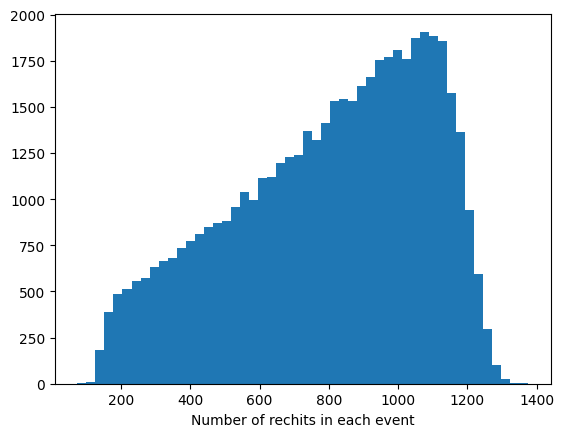

In [28]:
plt.hist(df['nhits'], bins = 50)
plt.xlabel('Number of rechits in each event')

In [29]:
print("Number of columns:", len(df.columns))
print("Column names:")
print(df.columns.tolist())
for col in df.columns:
    print(col)

Number of columns: 86
Column names:
['z_E_sum_layer_0', 'z_E_sum_layer_1', 'z_E_sum_layer_2', 'z_E_sum_layer_3', 'z_E_sum_layer_4', 'z_E_sum_layer_5', 'z_E_sum_layer_6', 'z_E_sum_layer_7', 'z_E_sum_layer_8', 'z_E_sum_layer_9', 'z_E_sum_layer_10', 'z_E_sum_layer_11', 'z_E_sum_layer_12', 'z_E_sum_layer_13', 'z_E_sum_layer_14', 'z_E_sum_layer_15', 'z_E_sum_layer_16', 'z_E_sum_layer_17', 'z_E_sum_layer_18', 'z_E_sum_layer_19', 'z_E_sum_layer_20', 'z_E_sum_layer_21', 'z_E_sum_layer_22', 'z_E_sum_layer_23', 'z_E_sum_layer_24', 'z_E_sum_layer_25', 'z_E_sum_layer_26', 'z_E_sum_layer_27', 'e1_by_e7_0', 'e1_by_e7_1', 'e1_by_e7_2', 'e1_by_e7_3', 'e1_by_e7_4', 'e1_by_e7_5', 'e1_by_e7_6', 'e1_by_e7_7', 'e1_by_e7_8', 'e1_by_e7_9', 'e1_by_e7_10', 'e1_by_e7_11', 'e1_by_e7_12', 'e1_by_e7_13', 'e1_by_e7_14', 'e1_by_e7_15', 'e1_by_e7_16', 'e1_by_e7_17', 'e1_by_e7_18', 'e1_by_e7_19', 'e1_by_e7_20', 'e1_by_e7_21', 'e1_by_e7_22', 'e1_by_e7_23', 'e1_by_e7_24', 'e1_by_e7_25', 'e1_by_e7_26', 'e1_by_e7_27', 'e7

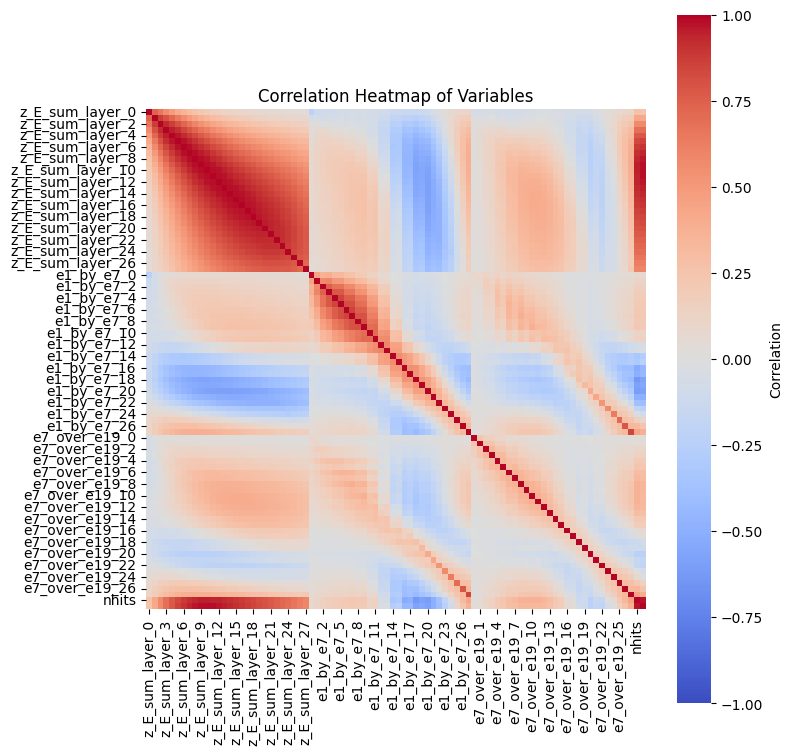

In [30]:
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f",
            vmin=-1, vmax=1, square=True, cbar_kws={'label': 'Correlation'})
plt.title("Correlation Heatmap of Variables")
plt.tight_layout()
plt.show()

In [31]:
# X = np.array(df.drop(['target_energy'], axis=1).astype(float))
# y = np.array(df['target_energy'])

In [32]:
# X = df.drop(['target_energy'], axis=1)
# y = df['target_energy']

In [33]:
X = df.drop(['target_energy'], axis=1)
y = df['target_energy']

In [34]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Step 1: Split into temp (train+val) and test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Split temp into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


In [35]:
# xgbc = XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # add any parameters you want
xgbr = XGBRegressor(
    objective='reg:squarederror',  # recommended for regression
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6
)

In [36]:
X_train.columns

Index(['z_E_sum_layer_0', 'z_E_sum_layer_1', 'z_E_sum_layer_2',
       'z_E_sum_layer_3', 'z_E_sum_layer_4', 'z_E_sum_layer_5',
       'z_E_sum_layer_6', 'z_E_sum_layer_7', 'z_E_sum_layer_8',
       'z_E_sum_layer_9', 'z_E_sum_layer_10', 'z_E_sum_layer_11',
       'z_E_sum_layer_12', 'z_E_sum_layer_13', 'z_E_sum_layer_14',
       'z_E_sum_layer_15', 'z_E_sum_layer_16', 'z_E_sum_layer_17',
       'z_E_sum_layer_18', 'z_E_sum_layer_19', 'z_E_sum_layer_20',
       'z_E_sum_layer_21', 'z_E_sum_layer_22', 'z_E_sum_layer_23',
       'z_E_sum_layer_24', 'z_E_sum_layer_25', 'z_E_sum_layer_26',
       'z_E_sum_layer_27', 'e1_by_e7_0', 'e1_by_e7_1', 'e1_by_e7_2',
       'e1_by_e7_3', 'e1_by_e7_4', 'e1_by_e7_5', 'e1_by_e7_6', 'e1_by_e7_7',
       'e1_by_e7_8', 'e1_by_e7_9', 'e1_by_e7_10', 'e1_by_e7_11', 'e1_by_e7_12',
       'e1_by_e7_13', 'e1_by_e7_14', 'e1_by_e7_15', 'e1_by_e7_16',
       'e1_by_e7_17', 'e1_by_e7_18', 'e1_by_e7_19', 'e1_by_e7_20',
       'e1_by_e7_21', 'e1_by_e7_22', 'e1_by_e7_

In [37]:
xgbr.fit(X_train, y_train, eval_set=[(X_val,y_val)], verbose= True)

[0]	validation_0-rmse:87.50237
[1]	validation_0-rmse:78.89433
[2]	validation_0-rmse:71.15963
[3]	validation_0-rmse:64.21638
[4]	validation_0-rmse:57.96062
[5]	validation_0-rmse:52.33859
[6]	validation_0-rmse:47.29039
[7]	validation_0-rmse:42.75418
[8]	validation_0-rmse:38.65857
[9]	validation_0-rmse:34.99109
[10]	validation_0-rmse:31.69020
[11]	validation_0-rmse:28.73063
[12]	validation_0-rmse:26.07305
[13]	validation_0-rmse:23.69438
[14]	validation_0-rmse:21.56547
[15]	validation_0-rmse:19.65390
[16]	validation_0-rmse:17.94195
[17]	validation_0-rmse:16.40643
[18]	validation_0-rmse:15.04024
[19]	validation_0-rmse:13.81723
[20]	validation_0-rmse:12.74254
[21]	validation_0-rmse:11.79331
[22]	validation_0-rmse:10.96158
[23]	validation_0-rmse:10.23627
[24]	validation_0-rmse:9.59121
[25]	validation_0-rmse:9.02794
[26]	validation_0-rmse:8.53849
[27]	validation_0-rmse:8.11429
[28]	validation_0-rmse:7.74366
[29]	validation_0-rmse:7.42413
[30]	validation_0-rmse:7.14429
[31]	validation_0-rmse:6.

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [38]:
from sklearn.model_selection import cross_val_score, KFold

scores = cross_val_score(xgbr, X_train, y_train)
print("Mean cross-validation score: %.2f" % scores.mean())

Mean cross-validation score: 1.00


In [39]:
test_score = xgbr.score(X_test, y_test)  # Accuracy by default
print("Test score: %.2f" % test_score)

Test score: 1.00


In [40]:
y_test_np = y_test.values if hasattr(y_test, 'values') else np.array(y_test)
y_pred = xgbr.predict(X_test)
y_pred = xgbr.predict(X_test)

# Ensure both arrays are NumPy arrays
y_test_np = y_test.values if hasattr(y_test, 'values') else np.array(y_test)
y_pred_np = y_pred.values if hasattr(y_pred, 'values') else np.array(y_pred)

# Now you can use:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_np, y_pred_np)
r2 = r2_score(y_test_np, y_pred_np)

print(f"Test MSE: {mse:.4f}")
print(f"Test R² : {r2:.4f}")


Test MSE: 22.2600
Test R² : 0.9976


In [41]:
epsilon = 1e-8
response = y_test_np.flatten() / (y_pred_np.flatten() + epsilon)

# Optionally: restrict to reasonable range (truncate manually)
response = response[(response > 0.9) & (response < 1.1)]  # or whatever makes sense

In [42]:
def truncated_gaussian(x, mu, sigma, a, b):
    # a and b are bounds in standard normal units
    a_scaled = (a - mu) / sigma
    b_scaled = (b - mu) / sigma
    return truncnorm.pdf(x, a_scaled, b_scaled, loc=mu, scale=sigma)

In [43]:
# Histogram
counts, bin_edges = np.histogram(response, bins=1000, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Fit
popt, _ = curve_fit(
    lambda x, mu, sigma: truncated_gaussian(x, mu, sigma, a=0.9, b=1.1),
    bin_centers, counts, p0=[1.0, 0.1]
)
mu_fit, sigma_fit = popt

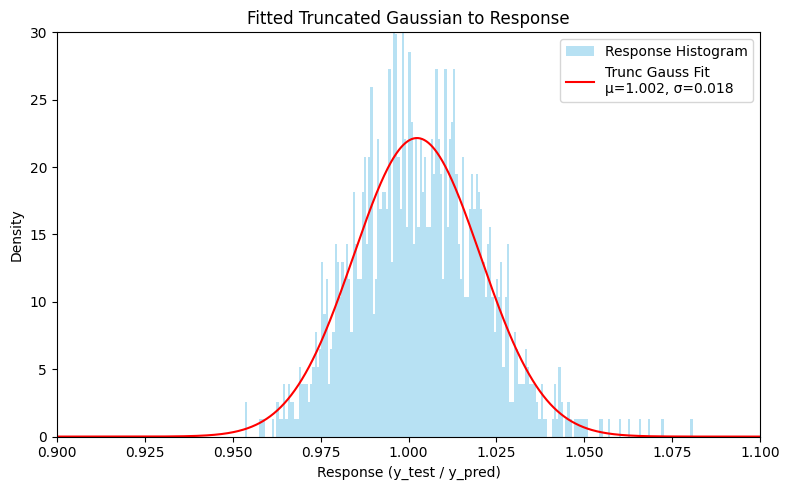

In [52]:
x_vals = np.linspace(0.9, 1.1, 1000)
pdf_vals = truncated_gaussian(x_vals, mu_fit, sigma_fit, a=0.5, b=1.5)

plt.figure(figsize=(8, 5))
plt.hist(response, bins=200, density=True, color='skyblue', alpha=0.6, label='Response Histogram')
plt.plot(x_vals, pdf_vals, 'r-', label=f'Trunc Gauss Fit\nμ={mu_fit:.3f}, σ={sigma_fit:.3f}')
plt.xlabel('Response (y_test / y_pred)')
plt.xlim(0.9, 1.1)
plt.ylim(0, 30)
plt.ylabel('Density')
plt.title('Fitted Truncated Gaussian to Response')
plt.legend()
plt.tight_layout()
plt.show()

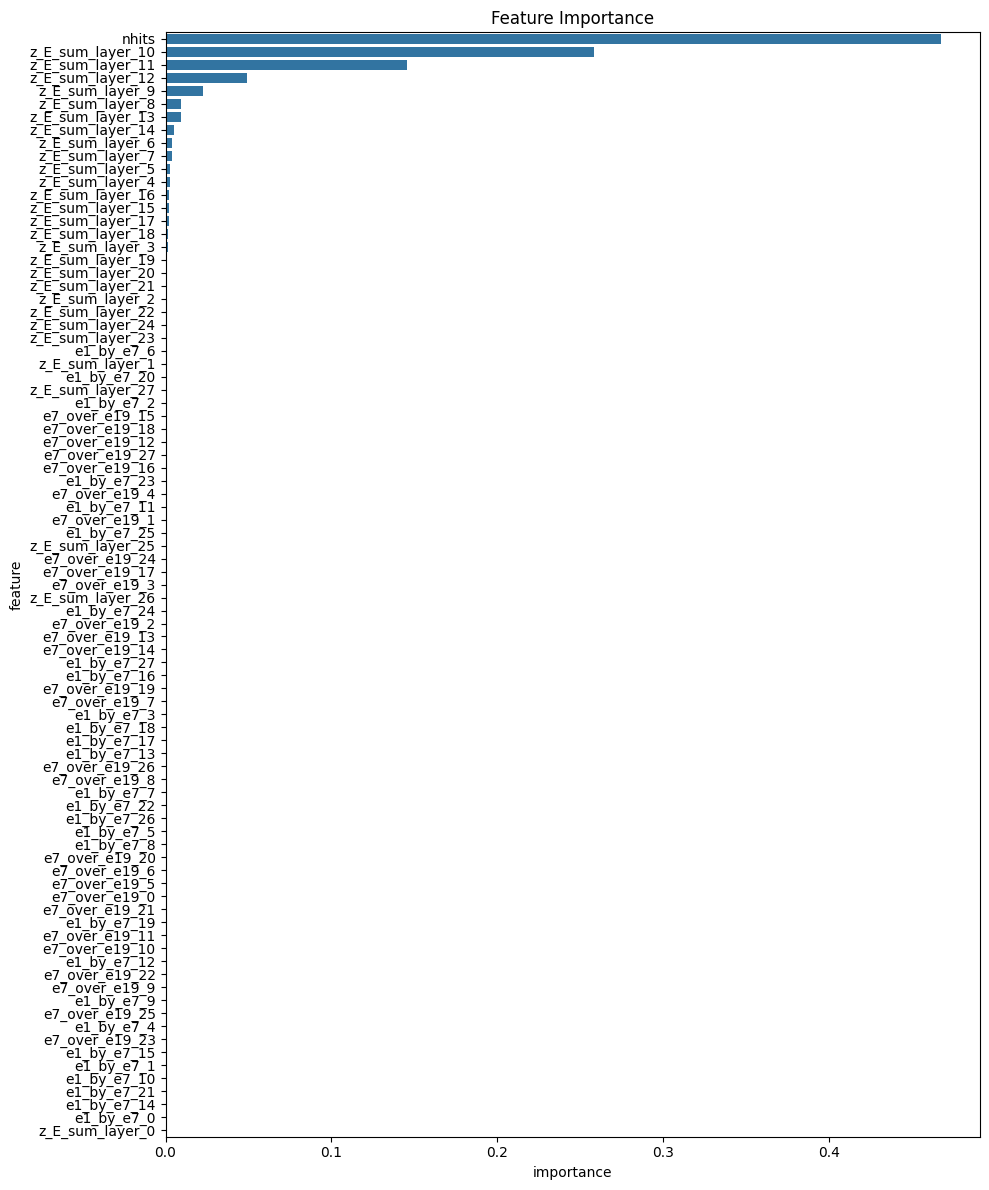

In [45]:
import seaborn as sns

# Plot feature importance
importance = xgbr.feature_importances_
# feature_importance = pd.DataFrame({
#     'feature': X_train.columns,
#     'importance': importance
# }).sort_values('importance', ascending=False)


# feature_names = [f'feature_{i}' for i in range(X_train.shape[1])]

feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importance
}).sort_values('importance', ascending=False)

# plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 12))  # taller figure

sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout() 
plt.show()

In [11]:
import pickle
import numpy as np
import torch

with open("/home/bbapi/pickles/trueE_target.pickle", "rb") as f:
    targets = pickle.load(f)
targets = np.asarray(targets).reshape(-1, 1)

# --------------------------
# Load train/valid indices
# --------------------------

with open("/home/bbapi/pickles/all_valididx.pickle", "rb") as f:
    valid_ids = pickle.load(f)

# Ensure NumPy arrays
valid_ids = np.array(valid_ids)

# --------------------------
# Slice features and targets
# --------------------------
y_test = targets[valid_ids]

BDT_pred = np.load("/home/bbapi/data_splits/best_val_predictions.npy")
y_pred = BDT_pred.ravel()
y_pred_np = y_pred.cpu().numpy() if torch.is_tensor(y_pred) else y_pred

# y_test is likely still a pandas Series or NumPy array
y_test_np = y_test.values if hasattr(y_test, 'values') else y_test

# Avoid division by zero
epsilon = 1e-8
response = y_test_np.flatten() / (y_pred_np.flatten() + epsilon)

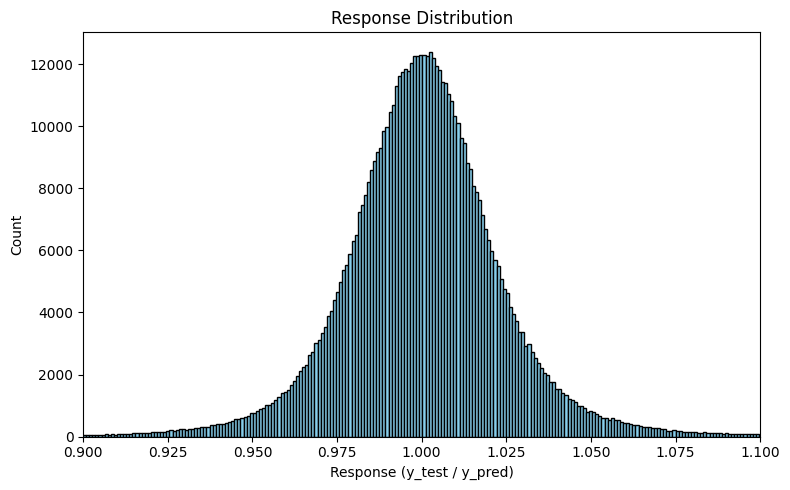

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.hist(response, bins=10000, color='skyblue', edgecolor='black')
plt.xlabel('Response (y_test / y_pred)')
plt.ylabel('Count')
plt.xlim(0.9, 1.1)
plt.title('Response Distribution')
plt.tight_layout()
plt.show()

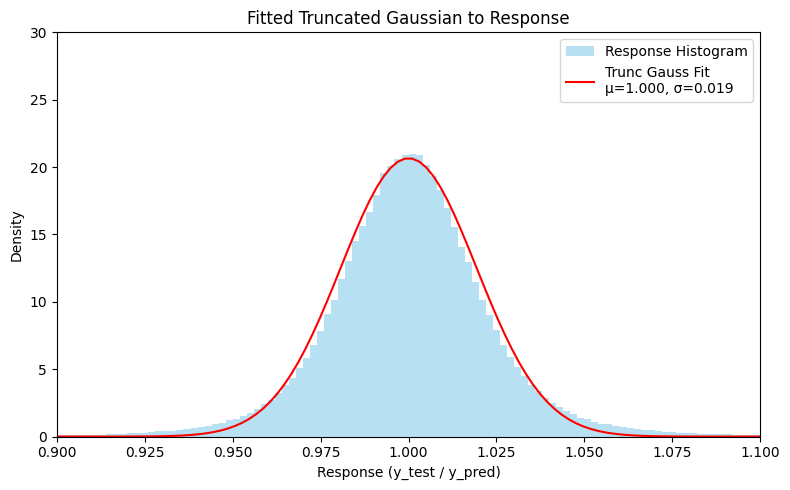

In [15]:
epsilon = 1e-8
response = y_test_np.flatten() / (y_pred_np.flatten() + epsilon)

# Optionally: restrict to reasonable range (truncate manually)
response = response[(response > 0.9) & (response < 1.1)]  # or whatever makes sense
def truncated_gaussian(x, mu, sigma, a, b):
    # a and b are bounds in standard normal units
    a_scaled = (a - mu) / sigma
    b_scaled = (b - mu) / sigma
    return truncnorm.pdf(x, a_scaled, b_scaled, loc=mu, scale=sigma)
# Histogram
from scipy.stats import truncnorm
from scipy.optimize import curve_fit
counts, bin_edges = np.histogram(response, bins=1000, density=True)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

# Fit
popt, _ = curve_fit(
    lambda x, mu, sigma: truncated_gaussian(x, mu, sigma, a=0.9, b=1.1),
    bin_centers, counts, p0=[1.0, 0.1]
)
mu_fit, sigma_fit = popt
x_vals = np.linspace(0.9, 1.1, 100)
pdf_vals = truncated_gaussian(x_vals, mu_fit, sigma_fit, a=0.5, b=1.5)

plt.figure(figsize=(8, 5))
plt.hist(response, bins=100, density=True, color='skyblue', alpha=0.6, label='Response Histogram')
plt.plot(x_vals, pdf_vals, 'r-', label=f'Trunc Gauss Fit\nμ={mu_fit:.3f}, σ={sigma_fit:.3f}')
plt.xlabel('Response (y_test / y_pred)')
plt.xlim(0.9, 1.1)
plt.ylim(0, 30)
plt.ylabel('Density')
plt.title('Fitted Truncated Gaussian to Response')
plt.legend()
plt.tight_layout()
plt.show()

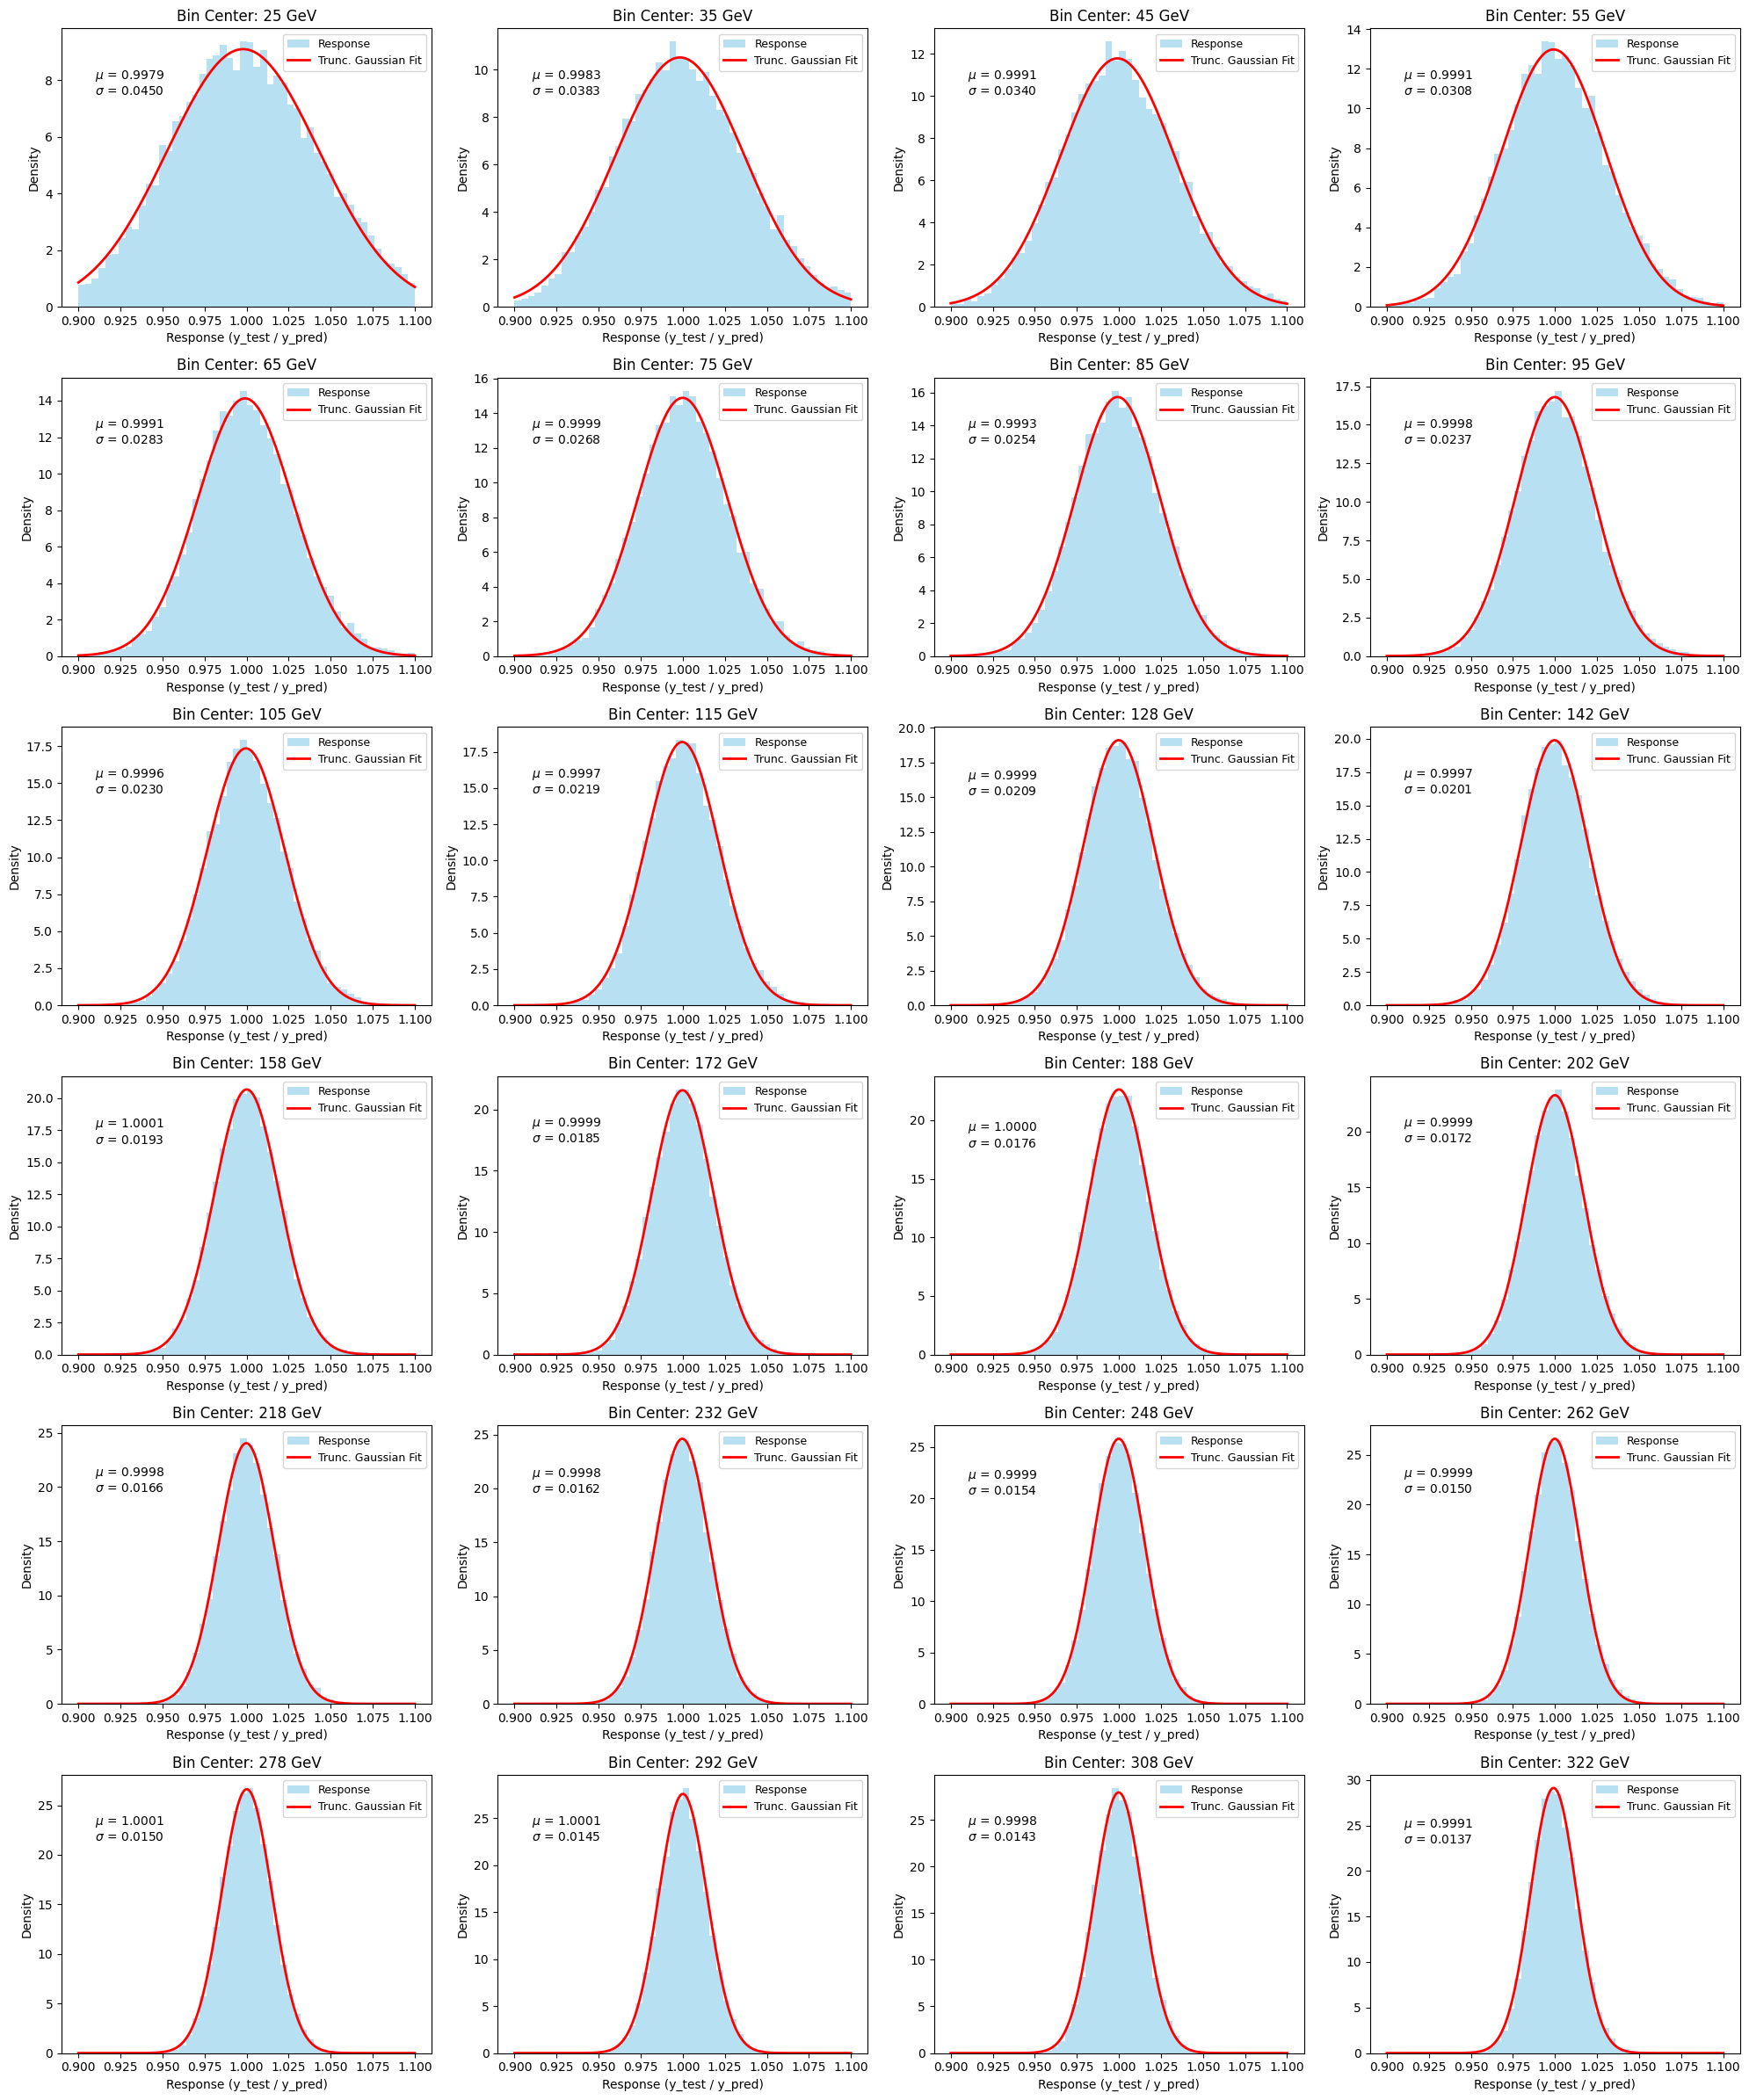

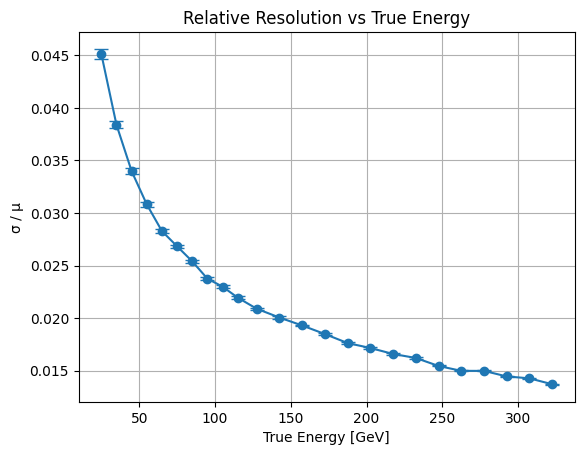

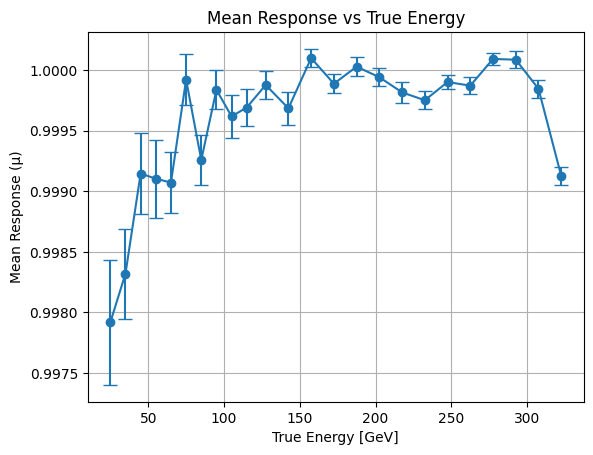

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from scipy.optimize import curve_fit

# Truncated Gaussian PDF
def truncated_gaussian(x, mu, sigma, a=0.9, b=1.1):
    a_, b_ = (a - mu) / sigma, (b - mu) / sigma
    return truncnorm.pdf(x, a_, b_, loc=mu, scale=sigma)

# Fit wrapper
def fit_func(x, mu, sigma):
    return truncated_gaussian(x, mu, sigma)

# Step 1: Prepare data
y_test_np = y_test.values if hasattr(y_test, 'values') else y_test
y_pred_np = y_pred
y_test_np = y_test_np.flatten()
y_pred_np = y_pred_np.flatten()

# Step 2: Binning based on y_test
# bin_edges = np.arange(0, y_test_np.max()+10 , 10)


# bin_edges = np.arange(5, y_test_np.max() + 10, 10)

bin_edges = np.concatenate([
    np.arange(20, 120, 10),     # finer bins: 20, 25, 30, ..., 95
    np.arange(120, y_test_np.max() + 20, 15)  # coarser bins beyond 100 GeV
])

bin_edges = bin_edges[:-2]

bin_indices = np.digitize(y_test_np, bin_edges)

# Step 3: Containers
response_bins = []
bin_centers = []
mu_vals, sigma_vals, mu_errs, sigma_errs = [], [], [], []
epsilon = 1e-8

# Step 4: Fit truncated Gaussian per bin
for i in range(1, len(bin_edges)):
    indices = np.where(bin_indices == i)[0]
    if len(indices) < 10:
        continue

    y_test_bin = y_test_np[indices]
    y_pred_bin = y_pred_np[indices]
    response = y_test_bin / (y_pred_bin + epsilon)
    response_bins.append(response)
    center = (bin_edges[i - 1] + bin_edges[i]) / 2
    bin_centers.append(center)

    hist_vals, bin_edges_hist = np.histogram(response, bins=50, range=(0.9, 1.1), density=True)
    bin_centers_hist = 0.5 * (bin_edges_hist[1:] + bin_edges_hist[:-1])
    mu_guess = np.mean(response)
    sigma_guess = np.std(response)

    try:
        popt, pcov = curve_fit(fit_func, bin_centers_hist, hist_vals, p0=[mu_guess, sigma_guess])
        mu_fit, sigma_fit = popt
        mu_vals.append(mu_fit)
        sigma_vals.append(sigma_fit)
        mu_errs.append(np.sqrt(pcov[0, 0]))
        sigma_errs.append(np.sqrt(pcov[1, 1]))
    except Exception as e:
        print(f"Fit failed for bin {i}: {e}")
        continue

# Step 5: Plot all fits with tight layout
n_plots = len(response_bins)
n_cols = 4
n_rows = int(np.ceil(n_plots / n_cols))

fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axs = axs.flatten() if n_plots > 1 else [axs]

for plot_idx in range(n_plots):
    ax = axs[plot_idx]
    response = response_bins[plot_idx]
    center = bin_centers[plot_idx]
    mu_fit = mu_vals[plot_idx]
    sigma_fit = sigma_vals[plot_idx]

    hist_vals, bin_edges_hist = np.histogram(response, bins=50, range=(0.9, 1.1), density=True)
    bin_centers_hist = 0.5 * (bin_edges_hist[1:] + bin_edges_hist[:-1])
    x_fit = np.linspace(0.9, 1.1, 200)

    ax.hist(response, bins=50, range=(0.9, 1.1), density=True, alpha=0.6, color='skyblue', label='Response')
    ax.plot(x_fit, truncated_gaussian(x_fit, mu_fit, sigma_fit), 'r-', lw=2, label='Trunc. Gaussian Fit')
    ax.set_title(f'Bin Center: {center:.0f} GeV')
    ax.set_xlabel("Response (y_test / y_pred)")
    ax.set_ylabel("Density")
    ax.text(0.91, np.max(hist_vals) * 0.8, f"$\\mu$ = {mu_fit:.4f}\n$\\sigma$ = {sigma_fit:.4f}", fontsize=10)
    ax.legend(fontsize=9)

# Hide unused subplots
for j in range(n_plots, len(axs)):
    axs[j].axis("off")

plt.tight_layout()
plt.show()

# Step 6: Summary plots

# Convert lists to arrays
mu_vals = np.array(mu_vals)
sigma_vals = np.array(sigma_vals)
mu_errs = np.array(mu_errs)
sigma_errs = np.array(sigma_errs)
bin_centers = np.array(bin_centers)

# Calculate σ/μ and its uncertainty
sigma_over_mu = sigma_vals / mu_vals
sigma_over_mu_err = sigma_over_mu * np.sqrt((sigma_errs / sigma_vals)**2 + (mu_errs / mu_vals)**2)

# Plot σ/μ
plt.errorbar(bin_centers, sigma_over_mu, yerr=sigma_over_mu_err, fmt='o-', capsize=5)
plt.xlabel("True Energy [GeV]")
plt.ylabel("σ / μ")
plt.title("Relative Resolution vs True Energy")
plt.grid(True)
plt.show()

# Plot μ
plt.errorbar(bin_centers, mu_vals, yerr=mu_errs, fmt='o-', capsize=5)
plt.xlabel("True Energy [GeV]")
plt.ylabel("Mean Response (μ)")
plt.title("Mean Response vs True Energy")
plt.grid(True)
plt.show()



Stochastic term (S): 0.2273 ± 0.0006
Constant term (C):   0.0059 ± 0.0001


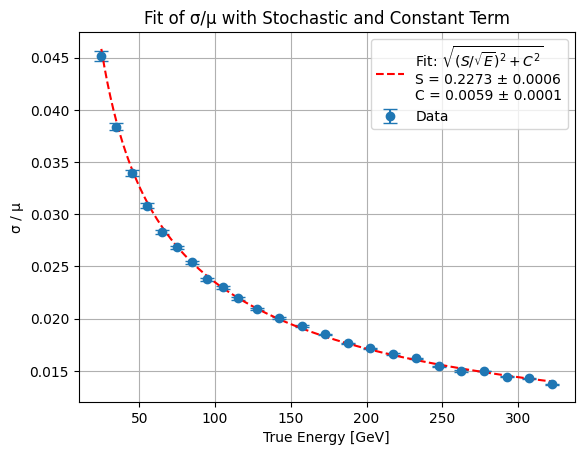

In [17]:
# Define fit function: sqrt( (S/sqrt(E))^2 + C^2 )
def resolution_model(E, S, C):
    return np.sqrt((S / np.sqrt(E))**2 + C**2)

# Initial guess: S = 0.3, C = 0.01
popt, pcov = curve_fit(resolution_model, bin_centers, sigma_over_mu,
                       sigma=sigma_over_mu_err, p0=[0.3, 0.01], absolute_sigma=True)

S_fit, C_fit = popt
S_err, C_err = np.sqrt(np.diag(pcov))

# Print results
print(f"Stochastic term (S): {S_fit:.4f} ± {S_err:.4f}")
print(f"Constant term (C):   {C_fit:.4f} ± {C_err:.4f}")

# Plot the fit over the data
E_plot = np.linspace(min(bin_centers), max(bin_centers), 300)
fit_curve = resolution_model(E_plot, S_fit, C_fit)

plt.errorbar(bin_centers, sigma_over_mu, yerr=sigma_over_mu_err, fmt='o', capsize=5, label='Data')
plt.plot(E_plot, fit_curve, 'r--', label=f'Fit: $\\sqrt{{(S/\\sqrt{{E}})^2 + C^2}}$\nS = {S_fit:.4f} ± {S_err:.4f}\nC = {C_fit:.4f} ± {C_err:.4f}')
plt.xlabel("True Energy [GeV]")
plt.ylabel("σ / μ")
plt.title("Fit of σ/μ with Stochastic and Constant Term")
plt.grid(True)
plt.legend()
plt.show()

In [48]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from xgboost import XGBRegressor

# # Step 1: Define selected features
# selected_layers = [0, 2, 4, 10, 20, 24, 27]  # indices within each class
# selected_columns = []

# for class_idx in range(3):
#     base = class_idx * 28
#     selected_columns.extend([base + i for i in selected_layers])

# # Step 2: Subset the data
# X_train_selected = X_train[:, selected_columns]
# X_val_selected = X_val[:, selected_columns]  # Optional if you use val set later
# X_test_selected = X_test[:, selected_columns]

# # Step 3: Train model on selected features
# xgbr = XGBRegressor(
#     objective='reg:squarederror',
#     n_estimators=100,
#     learning_rate=0.1,
#     max_depth=6
# )
# xgbr.fit(X_train_selected, y_train)

# # Step 4: Get feature importances
# importance = xgbr.feature_importances_
# feature_names = [f'feature_{i}' for i in selected_columns]

# feature_importance = pd.DataFrame({
#     'feature': feature_names,
#     'importance': importance
# }).sort_values('importance', ascending=False)

# # Step 5: Plot
# plt.figure(figsize=(10, 6))
# sns.barplot(x='importance', y='feature', data=feature_importance)
# plt.title('Feature Importance (Selected Layers Only)')
# plt.tight_layout()
# plt.show()


In [49]:

e1_over_e7_2 = np.array(df ['e1_by_e7_2'])
e1_over_e7_10 = np.array(df ['e1_by_e7_10'])
e1_over_e7_20 = np.array(df ['e1_by_e7_20'])

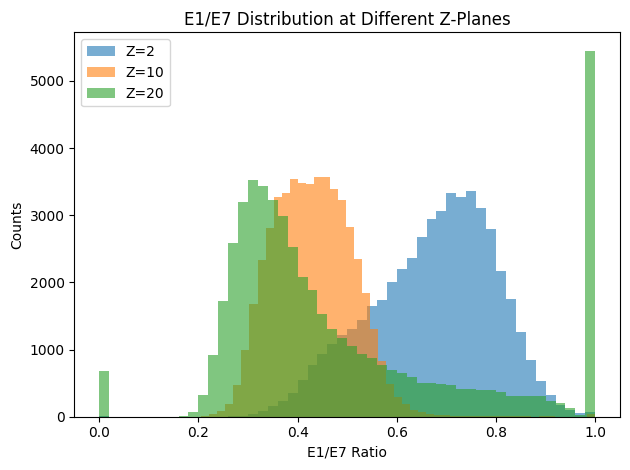

In [50]:
# plt.hist(e1_over_e7_2, bins = 28)
# plt.hist(e1_over_e7_10, bins = 28)
# plt.hist(e1_over_e7_20, bins = 28)

plt.hist(e1_over_e7_2, bins=50, alpha=0.6, label='Z=2')
plt.hist(e1_over_e7_10, bins=50, alpha=0.6, label='Z=10')
plt.hist(e1_over_e7_20, bins=50, alpha=0.6, label='Z=20')

plt.xlabel('E1/E7 Ratio')
plt.ylabel('Counts')
plt.title('E1/E7 Distribution at Different Z-Planes')
plt.legend()
plt.tight_layout()
plt.show()
